In [ ]:
!pip install numpy pandas matplotlib seaborn


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
df = pd.read_csv('/content/Refined_TK_data ver 2.csv')
df.sample(5)

,Detail of Gifts,Item Category,Name of Recipient,Affiliation,Date,Assessed Value,Retention Cost,Retained,Remarks
1413,One Bengal (18.300\ngrams net weight gold\na...,NaN,Donation for Earthquake\nRelief,NaN,2/22/2006,19700.0,0.0,Auctioned,"Auctioned for\nRs.20,110/-"
345,a. One mobile set\nNokia\nb. One Jewelry set,NaN,"Syed Yahya\nManawar, Political\nSecretary t...",Bureaucracy,2/14/2003,63602.0,8041.0,Yes,Yes
3280,One w/watch (concord\nNo.1394208) with pen...,Watch,"Mr. M. Hanif Khan,\nProtocol Officer Prim...",NaN,2/25/2016,90000.0,16000.0,Yes,Yes
4127,One W/Watch Rolex\nModel 50515\nSerial:423T...,Watch,"Mr. Asad Mehmood, Federal\nMinister for Com...",NaN,5/23/2022,2420000.0,0.0,No,No
2054,One shield,NaN,"Mr. Shaukat Aziz, Prime\nMinister of Pakistan",Gen Mus,9/10/2007,0.0,0.0,Yes,Yes


In [ ]:
df_copy = df.copy()

In [ ]:
df.shape

(4214, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4214 entries, 0 to 4213
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Detail of Gifts    4208 non-null   object 
 1   Item Category      2338 non-null   object 
 2   Name of Recipient  4214 non-null   object 
 3   Affiliation        3207 non-null   object 
 4   Date               4211 non-null   object 
 5   Assessed Value     4213 non-null   float64
 6   Retention Cost     4205 non-null   float64
 7   Retained           4203 non-null   object 
 8   Remarks            4203 non-null   object 
dtypes: float64(2), object(7)
memory usage: 296.4+ KB


In [ ]:
df.isnull().sum()

,0
Detail of Gifts,6
Item Category,1876
Name of Recipient,0
Affiliation,1007
Date,3
Assessed Value,1
Retention Cost,9
Retained,11
Remarks,11


In [ ]:
df[df['Detail of Gifts'].isnull() == True]

,Detail of Gifts,Item Category,Name of Recipient,Affiliation,Date,Assessed Value,Retention Cost,Retained,Remarks
537,NaN,NaN,"Mir Zafarullah Khan\nJamali, Prime\nMiniste...",Gen. Musharraf,12/15/2003,0.0,0.0,NaN,NaN
538,NaN,NaN,"Mr. Shaukat Aziz,\nFinance Minister",Gen. Musharraf,12/16/2003,0.0,0.0,NaN,NaN
539,NaN,NaN,"Mir Zafarullah Khan\nJamali, Prime\nMiniste...",Gen. Musharraf,12/19/2003,0.0,0.0,NaN,NaN
540,NaN,NaN,"Mir Zafarullah Khan\nJamali, Prime\nMiniste...",Gen. Musharraf,12/19/2003,0.0,0.0,NaN,NaN
541,NaN,NaN,"Mir Zafarullah Khan\nJamali, Prime\nMiniste...",Gen. Musharraf,12/19/2003,0.0,0.0,NaN,NaN
542,NaN,NaN,"Mr. Waqar Masood\nKhan, Secretary,\nEconomi...",Bureaucracy,12/23/2003,0.0,0.0,NaN,NaN


In [ ]:
df['Detail of Gifts'].value_counts().sum()

4208

In [ ]:
df.dropna(subset=['Detail of Gifts'],inplace = True)
df.head()

,Detail of Gifts,Item Category,Name of Recipient,Affiliation,Date,Assessed Value,Retention Cost,Retained,Remarks
0,Two small silver\nBowls,Decoration Pieces,"Mr. Abdul Sattar, Minister for Foreign\nA...",Gen. Musharrafarraf,1/8/2002,5000.0,0.0,Yes,Yes
1,One Pilot Pen with\nink,Pen,"Mr. Abdul Sattar, Minister for Foreign\nA...",Gen. Musharraf,1/8/2002,3500.0,0.0,Yes,Yes
2,One silver vase,Decoration Pieces,"Mr. Shaukat Aziz, Minister for Finance",Gen. Musharraf,1/9/2002,7500.0,0.0,Yes,Yes
3,One (decoration)\nfolding Screen,Decoration Pieces,"Mr. Abdul Sattar, Minister for Foreign\nAf...",Gen. Musharraf,1/15/2002,2200.0,0.0,Yes,Yes
4,One Decoration\nPiece,Decoration Pieces,"Mr. Abdul Sattar, Minister for Foreign\nA...",Gen. Musharraf,1/22/2002,2000.0,0.0,Yes,Yes


In [ ]:
df['Item Category'].sample(20)

,Item Category
479,Decoration Pieces
570,NaN
279,Watch
523,Decoration Pieces
2839,Carpet
1309,NaN
3374,Watch
2217,Watch
2858,Watch
2779,Jewellery/Accessories


In [ ]:
df['Item Category'].fillna('Unknown' , inplace = True)


In [ ]:
df['Affiliation'].fillna('Unknown')

,Affiliation
0,Gen. Musharrafarraf
1,Gen. Musharraf
2,Gen. Musharraf
3,Gen. Musharraf
4,Gen. Musharraf
...,...
4209,PMLN
4210,Unknown
4211,PMLN
4212,PMLN


<Axes: xlabel='Item_Category'>

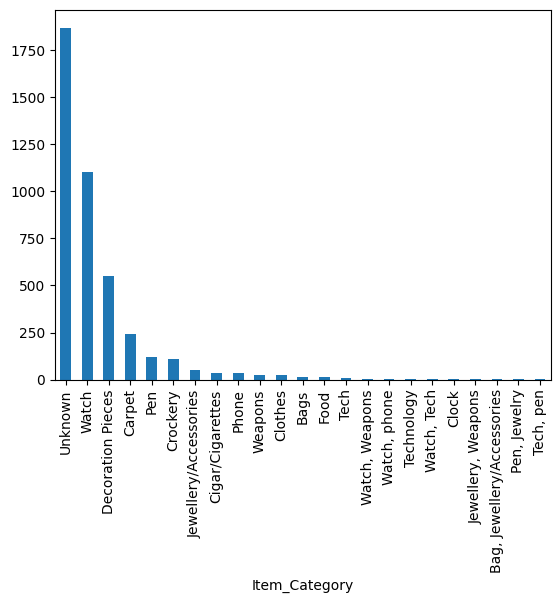

In [ ]:
#3.renaming columns to eliminate gaps in between column titles
#This Graph Shows The Highest Number Of Gift Recieved Is Unknown And Not Declared But In Second Highest Number Of Item Recieved Is Watch.
def renaming(df):
    df.rename(columns={'Detail of Gifts':'Detail_of_Gifts', "Item Category":'Item_Category',
                  'Name of Recipient':'Name_of_Recipient', 'Assessed Value':'Assessed_Value',
                  'Retention Cost':'Retention_Cost'},
              inplace=True)
renaming(df)
df['Item_Category'].value_counts().plot(kind = 'bar')

<Axes: xlabel='Affiliation'>

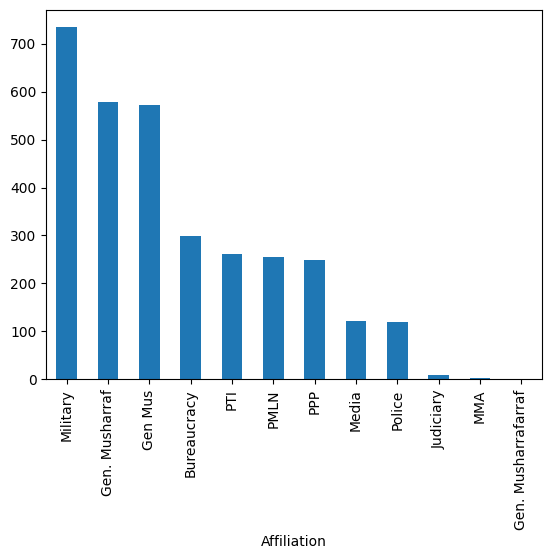

In [ ]:
#This Graph Shows That The Highest Number Of Gift Recieved In The Era Of Military Dictatorship And General Pervaiz Musharraf
df['Affiliation'].value_counts().plot(kind = 'bar')

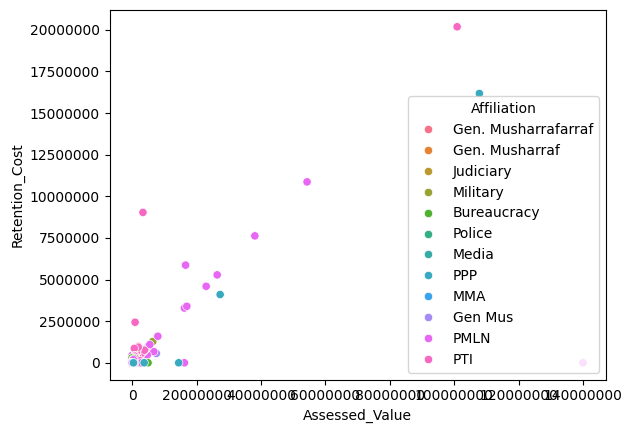

In [ ]:
sns.scatterplot(x = df['Assessed_Value'],y = df['Retention_Cost'],hue=df['Affiliation'] )
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
plt.ticklabel_format(style='plain')

In [ ]:
#PTI VS PMLN
def prepare_data(affiliation):
    filtered_df = df[df['Affiliation'] == affiliation]
    grouped = filtered_df.groupby(['Date', 'Retained']).size().unstack(fill_value=0)
    return grouped

# Prepare data for PTI and PMLN
pti_data = prepare_data('PTI')
pmln_data = prepare_data('PMLN')

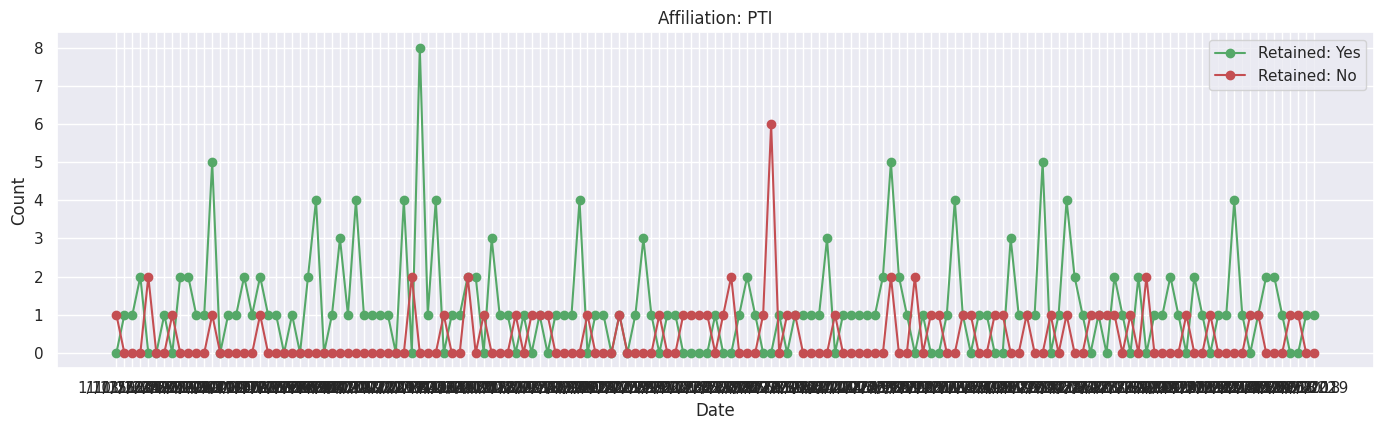

In [ ]:
plt.figure(figsize=(14, 8))

# Plot for PTI
plt.subplot(2, 1, 1)
plt.plot(pti_data.index, pti_data['Yes'], marker='o', linestyle='-', label='Retained: Yes', color='g')
plt.plot(pti_data.index, pti_data['No'], marker='o', linestyle='-', label='Retained: No', color='r')
plt.title('Affiliation: PTI')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid(True)


plt.tight_layout()
plt.show()

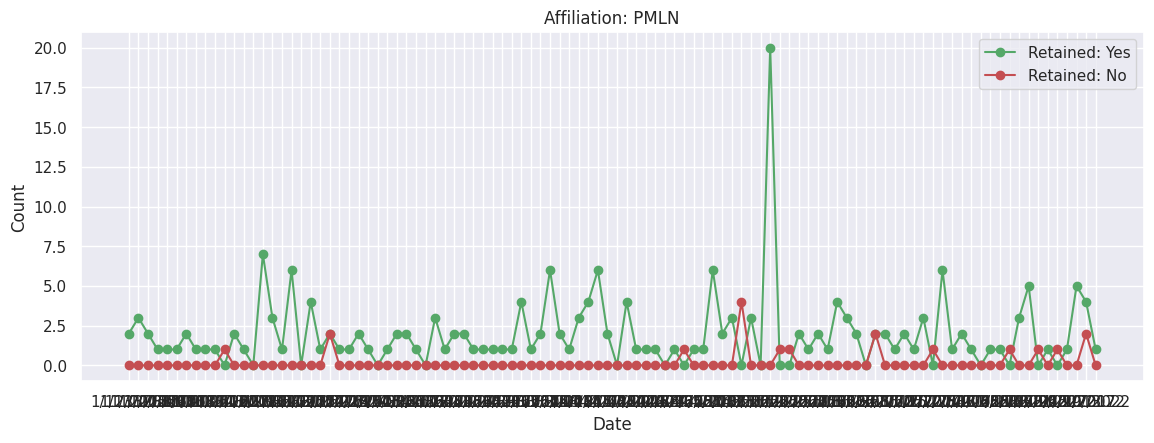

In [ ]:
# Plot for PMLN
plt.subplot(2, 1, 2)
plt.plot(pmln_data.index, pmln_data['Yes'], marker='o', linestyle='-', label='Retained: Yes', color='g')
plt.plot(pmln_data.index, pmln_data['No'], marker='o', linestyle='-', label='Retained: No', color='r')
plt.title('Affiliation: PMLN')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

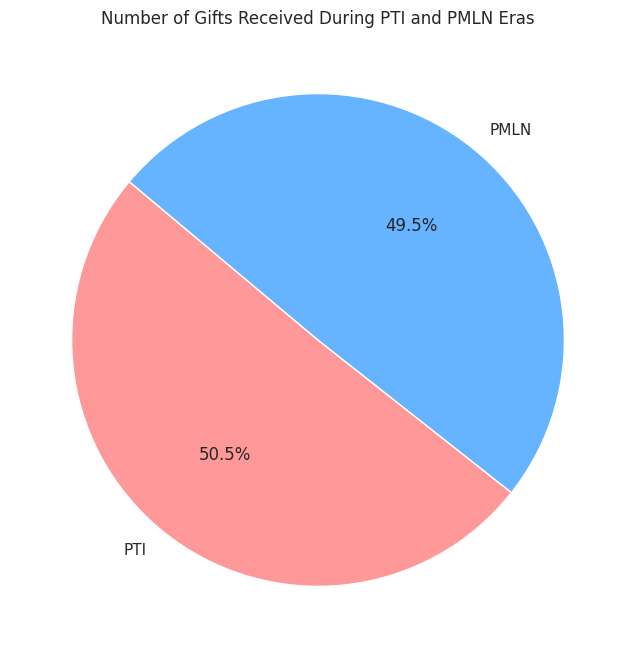

In [ ]:
filtered_df = df[df['Affiliation'].isin(['PTI', 'PMLN'])]

# Count the number of gifts received by each affiliation
affiliation_counts = filtered_df['Affiliation'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(affiliation_counts, labels=affiliation_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Number of Gifts Received During PTI and PMLN Eras')
plt.show()

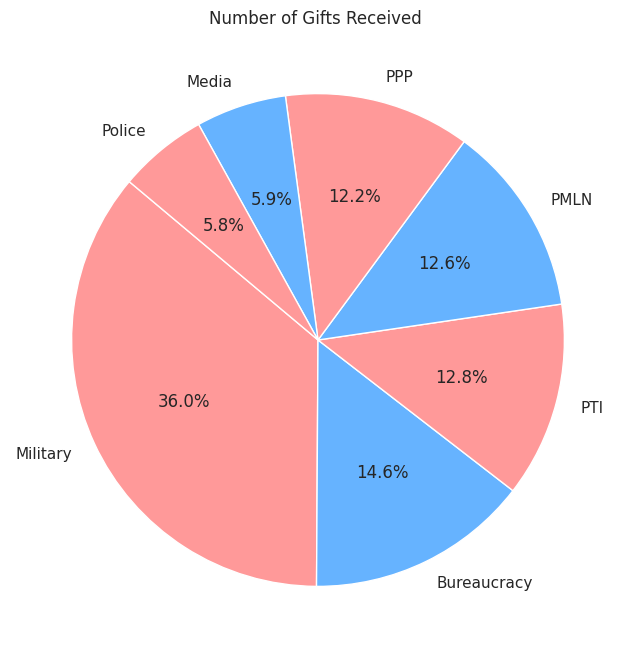

In [ ]:
filtered_df = df[df['Affiliation'].isin(['PTI', 'PMLN' ,'PPP' ,'Bureaucracy' , 'Media' ,'Police' ,'Military' ,'Gen.Musharraf'])]

# Count the number of gifts received by each affiliation
affiliation_counts = filtered_df['Affiliation'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(affiliation_counts, labels=affiliation_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Number of Gifts Received ')
plt.show()

**Pakistan ToshaKhana Files**

Here are few questions we can ask from this dataset:

What is the total value of all gifts received by former government officials from foreign leaders and dignitaries?

Which specific individuals received gifts from the Toshakhana, and what were those gifts?

Did any government officials declare the gifts they received to the Pakistani government or pay taxes on them?

Were there any patterns or trends in the types of gifts received by different officials or from different countries?

Did any gifts received by government officials influence their decisions or actions while in office?

How did the Toshakhana function in terms of record-keeping and accountability for the gifts it received and distributed?

What legal or ethical violations, if any, occurred as a result of officials receiving gifts from foreign leaders through the Toshakhana?

Were there any efforts made to conceal the receipt of gifts by government officials, and if so, how were those efforts carried out?

The highest number of gifts was received during the era of the Military Establishment and Gen.Musharraf

The total worth of all the gifts is 1.4 billion.

The most expensive gift received is worth 14 crore, and the retention cost is zero.

Almost the same number of gifts was received during the eras of both PMLN and PTI.

Most of the gifts are retained, but their retention cost is usually not paid.